In [1]:
# Import Libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


# Suppress specific FutureWarning in natura eath lowers dataset
warnings.simplefilter(action='ignore', category=FutureWarning)

# Essential libraries for data manipulation, visualization, and geographical data handling

In [2]:
# Import all data
crop_df = pd.read_csv('Dataset/API_AG.YLD.CREL.KG_DS2_en_csv_v2_5734359.csv', skiprows=4, usecols=['Country Name', 'Country Code', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])

population_df = pd.read_csv('Dataset/API_SP.POP.TOTL_DS2_en_csv_v2_4485025.csv', skiprows=4, usecols=['Country Name', 'Country Code', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [59]:
# Remove Nulls
crop_df = crop_df.dropna()
pop_df = population_df.dropna()


Text(0.5, 1.0, 'Cereal Yield of whole world in 2019')

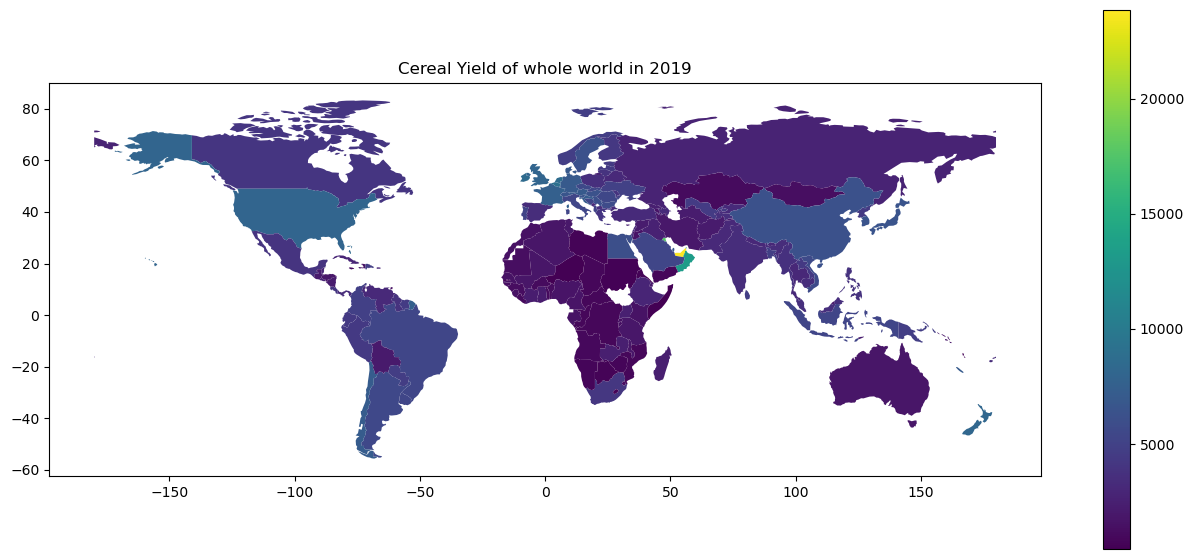

In [60]:
merged_df = pd.merge(world_map, crop_df, left_on='iso_a3', right_on='Country Code', how='inner')

merged_df.plot(column='2019', figsize=(16, 7), legend=True).set_title('Cereal Yield of whole world in 2019')


Choropleth map of Grain Yields of 2019. where light yellow color indicates higher cereal yield

Text(0.5, 1.0, 'Cereal Yield of whole world in 2020')

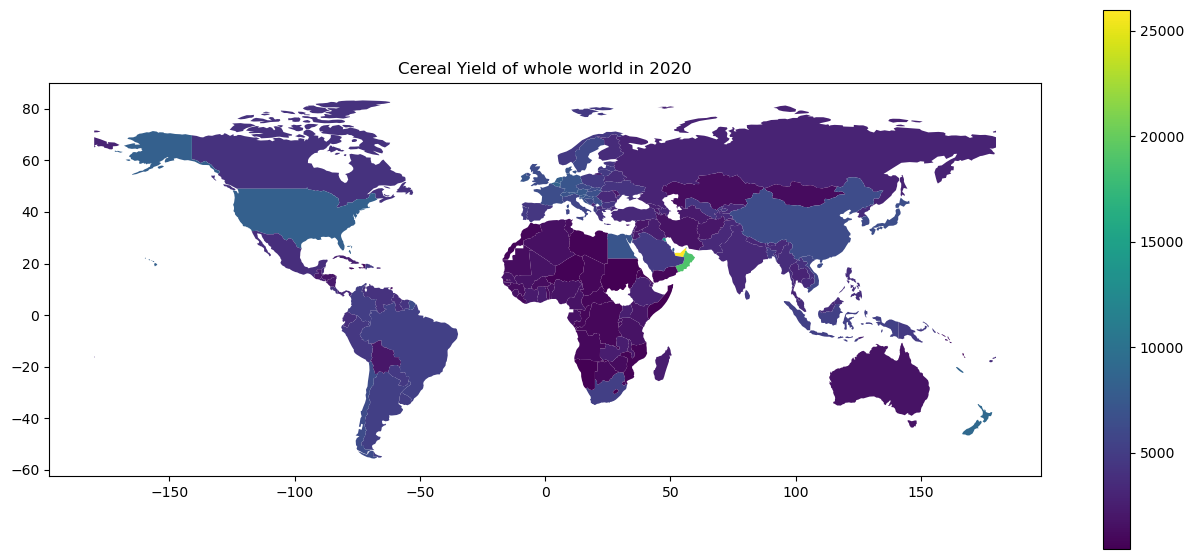

In [61]:
merged_df.plot(column='2020', figsize=(16, 7), legend=True).set_title('Cereal Yield of whole world in 2020')


Choropleth map of Grain Yields of 2020. it again showed the similar pattern

# TASK 1.2.1

In [62]:

populations = population_df[['Country Name', 'Country Code', '2021']]
crops = crop_df[['Country Name', 'Country Code', '2021']]
task_1_2_1_df = pd.merge(populations, crops, on='Country Code', suffixes=('_pop', '_crp'), how='inner')

task_1_2_1_df = pd.merge(world_map, task_1_2_1_df, left_on='iso_a3', right_on='Country Code', how='inner')

low_population_filter = task_1_2_1_df[task_1_2_1_df['2021_pop'] <= 67326569]



<Axes: >

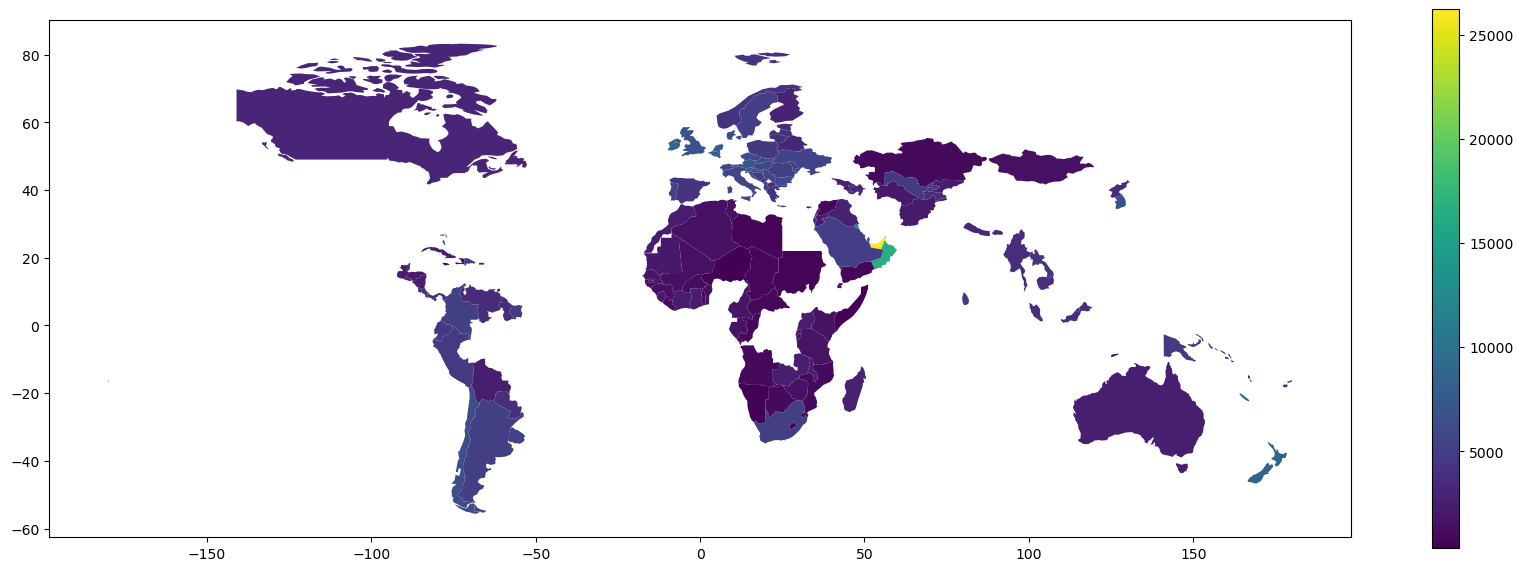

In [63]:
low_population_filter.plot(column='2021_crp', figsize=(21, 7), legend=True)


Choropleth map of Grain Yields having population less than or equal to 67326569.

# TASK 1.2.2

In [64]:
# Choropleth maps of crop yield for countries with a population greater than or equal to 331893745.
high_population_filter = task_1_2_1_df[task_1_2_1_df['2021_pop'] >= 331893745]


Text(0.5, 1.0, 'Choropleth maps of crop yield for countries with a population greater than or equal to 331893745.')

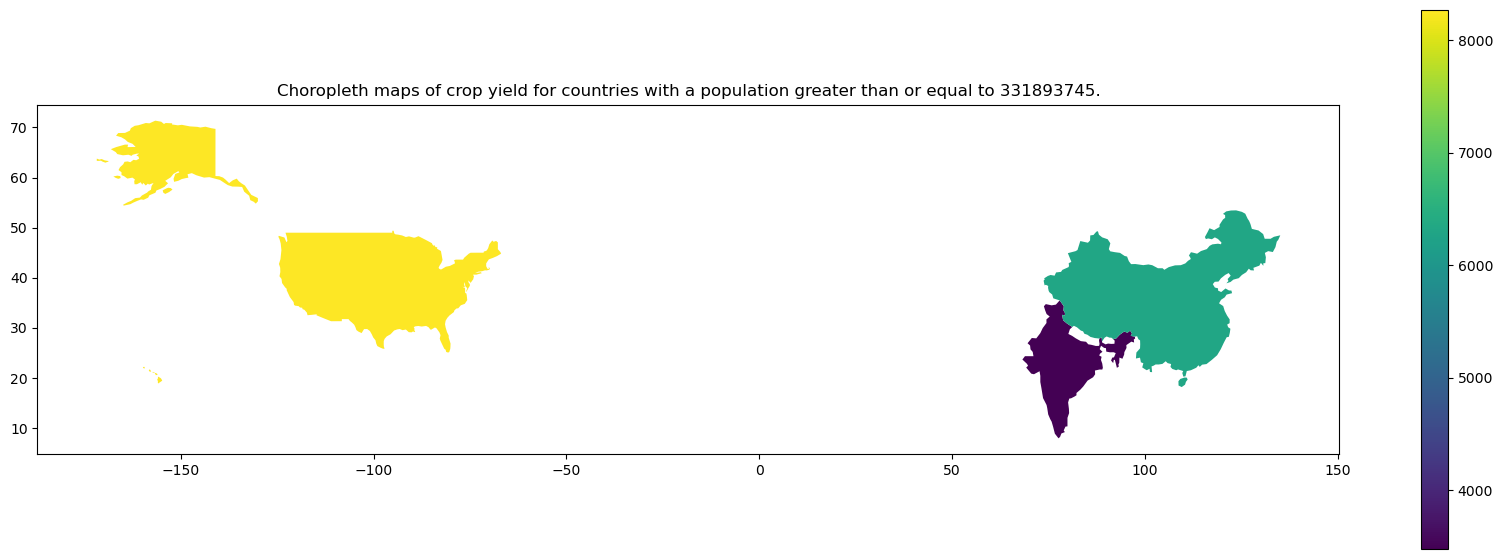

In [65]:
high_population_filter.plot(column='2021_crp', figsize=(21, 7), legend=True).set_title('Choropleth maps of crop yield for countries with a population greater than or equal to 331893745.')


Choropleth map of Grain Yields having population greater than or equal to 331893745. Only countries that are visible in this filter is USA having highest yield (Yellow) , then CHina in green and india in purpule.

In [66]:
# Generate choropleth maps of crop yield for countries with a population between 10269022 and 1393409034
mid_population_filter = task_1_2_1_df[(task_1_2_1_df['2021_pop'] >= 10269022) & (task_1_2_1_df['2021_pop'] <= 1393409034)]
mid_population_filter

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country Name_pop,Country Code,2021_pop,Country Name_crp,2021_crp
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,TZA,61498438.0,Tanzania,1651.1
2,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,CAN,38246108.0,Canada,3078.3
3,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,USA,331893745.0,United States,8268.0
4,18513930.0,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,KAZ,19002586.0,Kazakhstan,1049.0
5,33580650.0,Asia,Uzbekistan,UZB,57921,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",Uzbekistan,UZB,34915100.0,Uzbekistan,4735.9
...,...,...,...,...,...,...,...,...,...,...,...
153,36471769.0,Africa,Morocco,MAR,119700,"POLYGON ((-2.16991 35.16840, -1.79299 34.52792...",Morocco,MAR,37344787.0,Morocco,2328.2
154,100388073.0,Africa,Egypt,EGY,303092,"POLYGON ((36.86623 22.00000, 32.90000 22.00000...","Egypt, Arab Rep.",EGY,104258327.0,"Egypt, Arab Rep.",7132.5
156,112078730.0,Africa,Ethiopia,ETH,95912,"POLYGON ((47.78942 8.00300, 44.96360 5.00162, ...",Ethiopia,ETH,117876226.0,Ethiopia,2787.9
158,44269594.0,Africa,Uganda,UGA,35165,"POLYGON ((33.90371 -0.95000, 31.86617 -1.02736...",Uganda,UGA,47123533.0,Uganda,2456.1


Text(0.5, 1.0, 'Choropleth maps of crop yield for countries with a population between 10269022 and 1393409034')

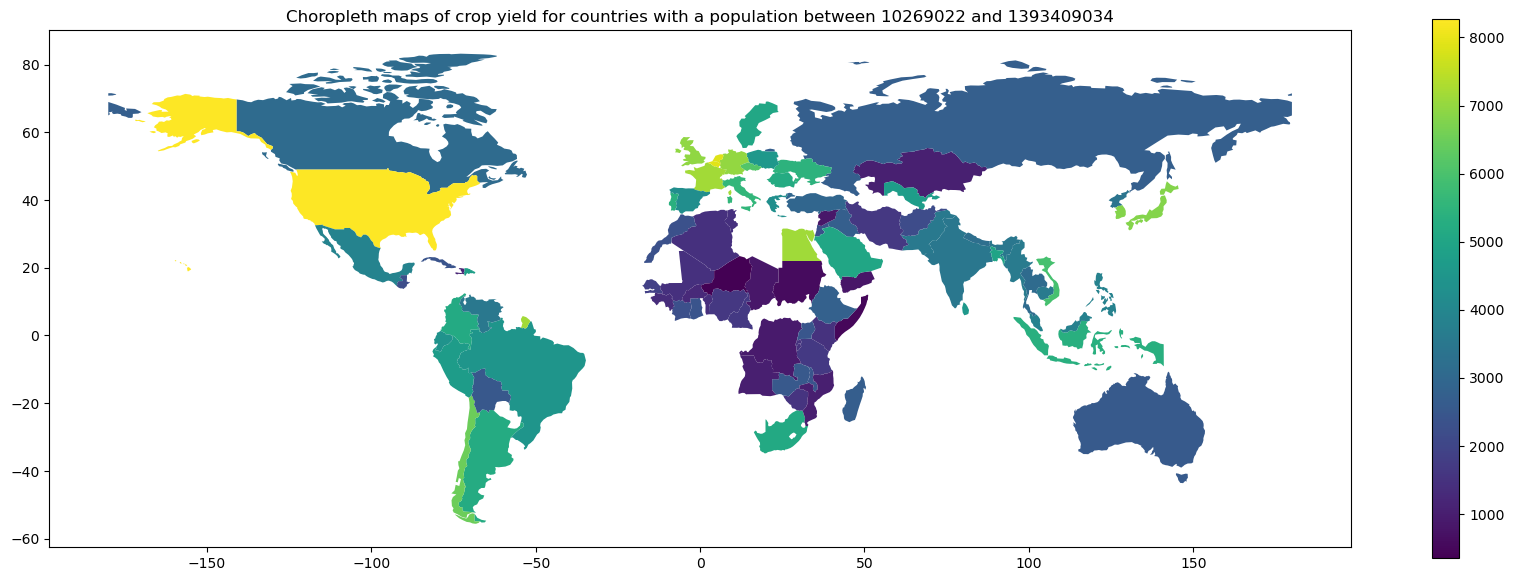

In [67]:
mid_population_filter.plot(column='2021_crp', figsize=(21, 7), legend=True).set_title('Choropleth maps of crop yield for countries with a population between 10269022 and 1393409034')


Choropleth map of Grain Yields having population between 10269022 and 1393409034 are USA, Belgium & Netherlands are the countries.

# TASK1.2.4

In [68]:
max_population_index = task_1_2_1_df['2021_pop'].idxmax()


In [69]:
# Retrieve the row with the maximum value
max_population_row = task_1_2_1_df.loc[max_population_index]
max_population_row

pop_est                                                  1397715000.0
continent                                                        Asia
name                                                            China
iso_a3                                                            CHN
gdp_md_est                                                   14342903
geometry            MULTIPOLYGON (((109.47520958866365 18.19770091...
Country Name_pop                                                China
Country Code                                                      CHN
2021_pop                                                 1412360000.0
Country Name_crp                                                China
2021_crp                                                       6320.8
Name: 134, dtype: object

In [70]:
task_1_2_4_filter = pd.merge(population_df, crop_df, on='Country Code', suffixes=('_pop', '_crp'), how='inner')
task_1_2_4_filter = pd.merge(world_map, task_1_2_4_filter, left_on='iso_a3', right_on='Country Code', how='inner')


In [71]:
china_filter = task_1_2_4_filter.loc[task_1_2_1_df['Country Code'] == 'CHN']
china_filter = china_filter.loc[:, '2011_crp':'2021_crp']
china_filter_pct = china_filter.pct_change(axis=1)
china_filter_pct


,2011_crp,2012_crp,2013_crp,2014_crp,2015_crp,2016_crp,2017_crp,2018_crp,2019_crp,2020_crp,2021_crp
134,NaN,0.020615,0.011498,-0.000153,0.015696,0.005329,0.015571,0.002307,0.022937,0.007708,0.001045


<Figure size 1200x800 with 0 Axes>

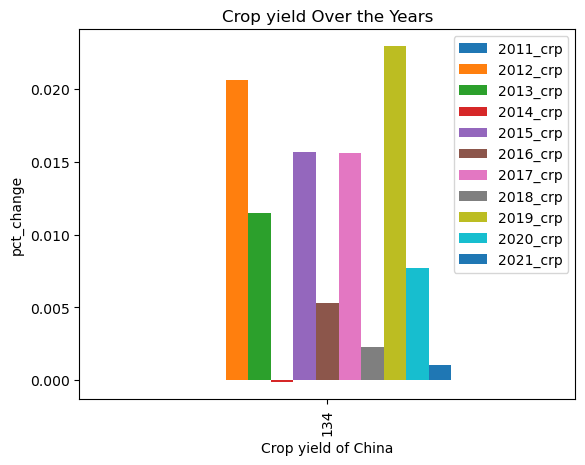

In [72]:
plt.figure(figsize=(12, 8))
china_filter_pct.plot(kind='bar')
plt.title('Crop yield Over the Years')
plt.xlabel('Crop yield of China')
plt.ylabel('pct_change')
plt.show()


China has the highest population. As per 2019, China has the highest crop yield. in year 2019 has the highest crop yield

# Task 1.2.5


In [73]:

crop_filter = crop_df[['Country Code', '2011', '2012', '2013', '2014', '2015','2016', '2017', '2018', '2019', '2020', '2021']]
crop_filter['mean_crop'] = crop_filter[['2011', '2012', '2013', '2014', '2015','2016', '2017', '2018', '2019', '2020', '2021']].mean(axis=1)
crop_filter = crop_filter[['Country Code', 'mean_crop']]


In [74]:
pop_filter = population_df[['Country Code', '2011', '2012', '2013', '2014', '2015','2016', '2017', '2018', '2019', '2020', '2021']]
pop_filter['mean_population'] = pop_filter[['2011', '2012', '2013', '2014', '2015','2016', '2017', '2018', '2019', '2020', '2021']].mean(axis=1)
pop_filter = pop_filter[['Country Code', 'mean_population']]


In [75]:

task_1_2_5_filter = pd.merge(pop_filter, crop_filter, on='Country Code', how='inner')


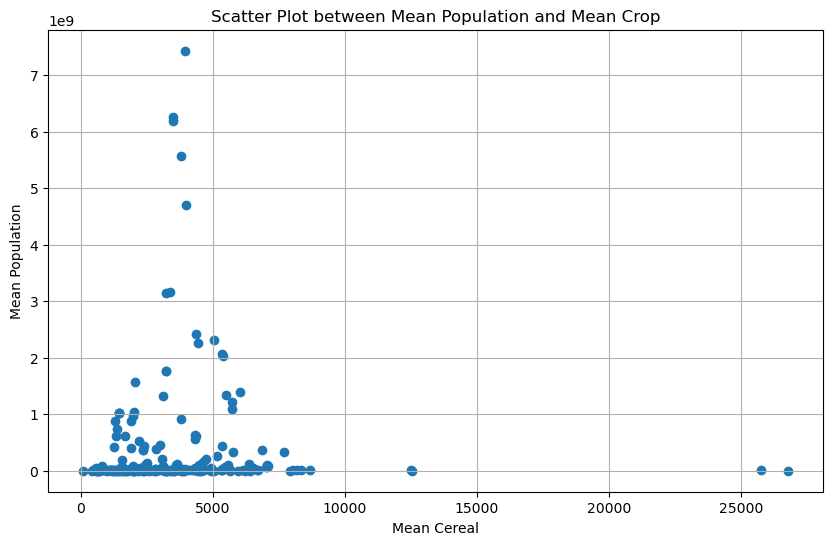

In [76]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(task_1_2_5_filter['mean_crop'], task_1_2_5_filter['mean_population'], )
plt.title('Scatter Plot between Mean Population and Mean Crop')
plt.xlabel('Mean Cereal')
plt.ylabel('Mean Population')
plt.grid(True)
plt.show()

Mean cereal yield increases with the decrease in population and only countries has higer population and cereal yield is the China and India while highest crop yield is of UAE